# **CMSE 381 Final Project**

### Group members: Tiffany Rennells,   
Section_002

## **Evaulating Predictors of Kidney Disease Progression Through Statistical Models**

## Background and Motivation

Chronic kidney disease (CKD) is a progressive condition characterized by loss of kidney function over the course of months to years. Due to the kidneys essential roles in regulating key biological mechanisms such as regulating fluid balance, filtering waste products, and regulating blood pressure to name a few, those with CKD experience severe cardiovascular complications, hospitalizations and mortality [1]. 

As of 2024, chronic kidney disease (CKD) affects 9.1% of the population worldwide, which accounts to approximately 737 million individuals [1]. It is considered a major public health problem not only because of its incidence rates, but also because individuals often are asymptomatic in the early stages leading to underdiagnosis and progressive kidney dysfunction [2]. This illustrated the importance of early detection through lab testing and screening for preventing disease progression and improving patient outcomes. 

CKD is a progressive condition characterized by decline in kidney function leading to increased risk of various disease including cardiovascular disease, kidney failure and premature death. Despite the prevalence of this disease, CKD often remains underdiagnosed making methods for early detection crucial [2]. 

In light of the demand for a diagnosis tool, data science has the potential to revolutionize this field serving as a powerful predictive tool for CKD. With the use of large training datasets of lab testing and standard screening results of individuals with and without CKD, it is possible to uncover patterns and relationships essential for early diagnosis and intervention for CKD. 

With promise in its use for this field, this project aims to leverage tools to develop and evaluate models that can accurately predict the presence and key indicators of CKD. A model predicting the presence and absence of the disease uses 2 classification methods: lasso logistic regression and random forest, while key indicators of the disease will be assessed through linear regression methods: **lasso linear regression and simple linear regression**. Successful use of these models have the potential for practical application of data driven methods to early diagnosis and intervention for patients with CKD to improve patient outcomes and decrease health burdens. 


## Methodology

**Classification**  
To predict the presence or absence of chronic kidney disease (CKD), we implemented two supervised learning methods: LASSO logistic regression and Random Forest classification.

The two methods were chosen for their contrasting approaches to classification. LASSO logistic regression produces a interpertable model by shrinking many coefficients to zero, essentially performing automatic variable selection. This makes it possible to identify the most clinically relevant predictors of CKD. Additionally, the regularization strength (alpha) can be tuned to control the degree of shrinkage allowing for control of flexibility of the model.  

In contrast, random forest is a nonlinear method for classification. It also offers parameters that can be fine-tuned to alter flexibility through parameters such as number of trees and maximum tree depth. In addition, compared to a single decision tree, random forest reduces variance by decorrelating trees. It does this by completing the model with only a random subset of predictors. This along with bootstrapping produces a more reliable classifier. 

By comparing these two models, we can evaluate the relative success of each models as well as the most influential variables in determining CKD presence. 

**Regression**


### Data

The original CKD dataset contained numerous categorical clinical features, many of which were given in intervals (ex, '1.009-1.011' or >4).  

Our data cleaning process involved simplifying each variable. All variables defined by an interval was separated into 'low' and 'high' numerical values, while categorical variables such as diabetes (dm) and hypertension (htn) were retained as binary variables.  

The final cleaned dataset consisted only of predictors making it suitable for both regression and classification applications. 

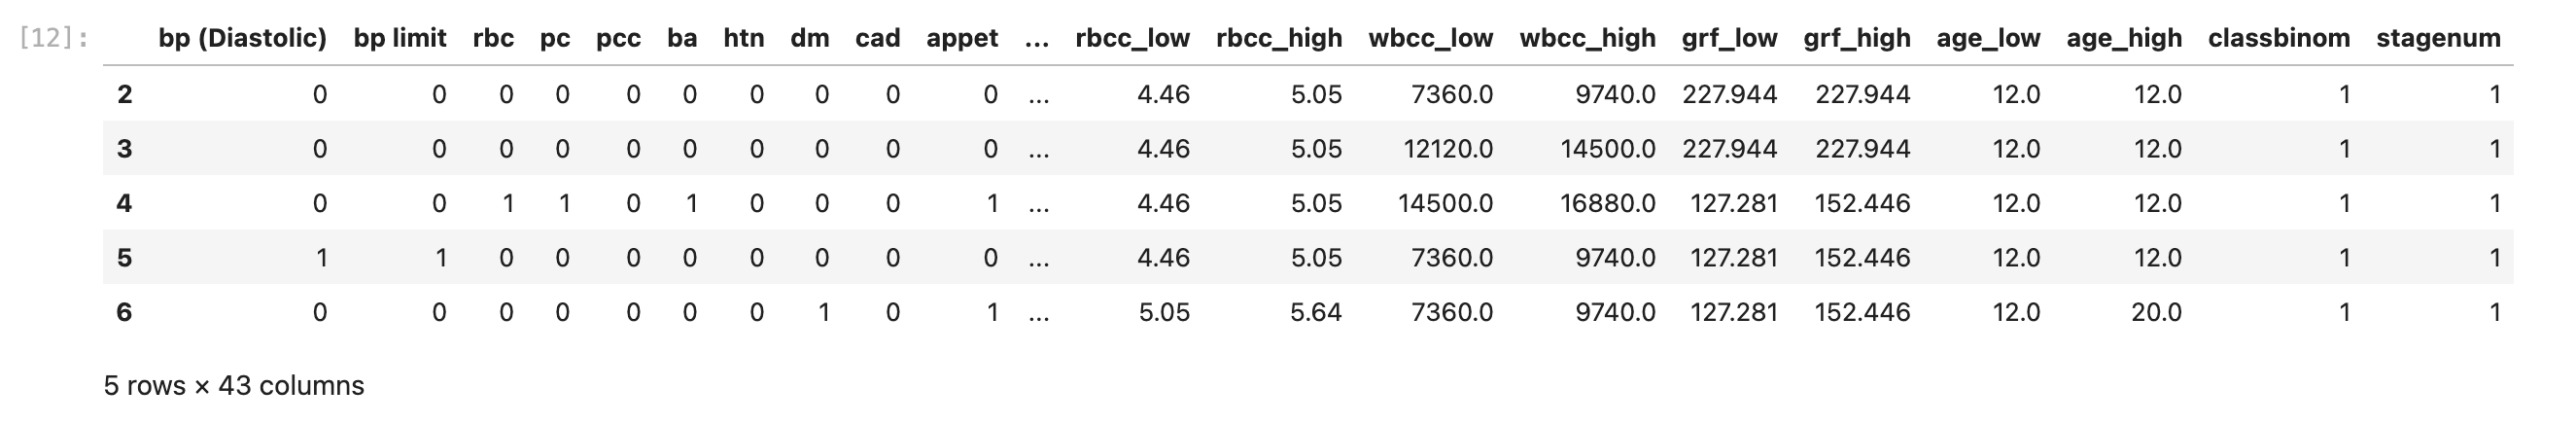


### Models for classification

#### Prepare the Data

In [11]:
# Prepare the predictors and target variables
y = df["classbinom"]
X = df.drop(columns=["classbinom", "stagenum", "affected"])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=381)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

#### Lasso Logistic Regression  

The lasso regression was performed by fitting x and y training dataset. The most optimal alpha value was chosen based on performing a 10-fold-cross-validation and selecting the alpha value that minimizes the CV error[4]. The method used for alpha value selection used GridSearchCV which facilitated the hyperparameter selection. Subsequently, the model was refit using the best alpha value while the testing dataset was used for accuracy of classification. Classification was achieved by converting prediction to a binary where above 0.5 = 1 (CKD present) and below 0.5 = 0 (no CKD). 

Lecture 27 Lecture 18: GridSearchCV

In [6]:
alpha_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]}

lasso = Lasso(random_state=381)

grid_lasso = GridSearchCV(lasso,alpha_grid,cv=10,scoring='neg_mean_squared_error',n_jobs=-1)

grid_lasso.fit(X_train_scaled, y_train)

print("Best alpha:", grid_lasso.best_params_['alpha'])
best_lasso = grid_lasso.best_estimator_

lasso_pred = (best_lasso.predict(X_test_scaled) > 0.5).astype(int)
lasso_acc = accuracy_score(y_test, lasso_pred)

print("LASSO Accuracy:", lasso_acc)

Best alpha: 0.01
LASSO Accuracy: 0.96


#### Random Forest Classification

 Random Forest classification was performed by training the model on X and y training datasets. To optimize the model, the maximum depth parameter was tuned through finding the maximum depth value that minimized a 5-fold-cross-validation. A range of depths were tested using GridSearchCV. After finding the best tree depth, the model was refit with the training dataset, and prediction accuracy was assessed using testing dataset. 

Lecture 25

In [33]:
param_grid = {'max_depth': [3, 5, 10, 20]}

rf = RandomForestClassifier(random_state=381)

grid = GridSearchCV(rf,param_grid,cv=5,scoring='accuracy',n_jobs=-1)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
best_rf = grid.best_estimator_

rf_pred = best_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)

Best parameters: {'max_depth': 5}
Random Forest Accuracy: 0.96


### Models for Regression

## Results

Lasso Logistic regression:  

https://www.w3schools.com/python/python_ml_confusion_matrix.asp

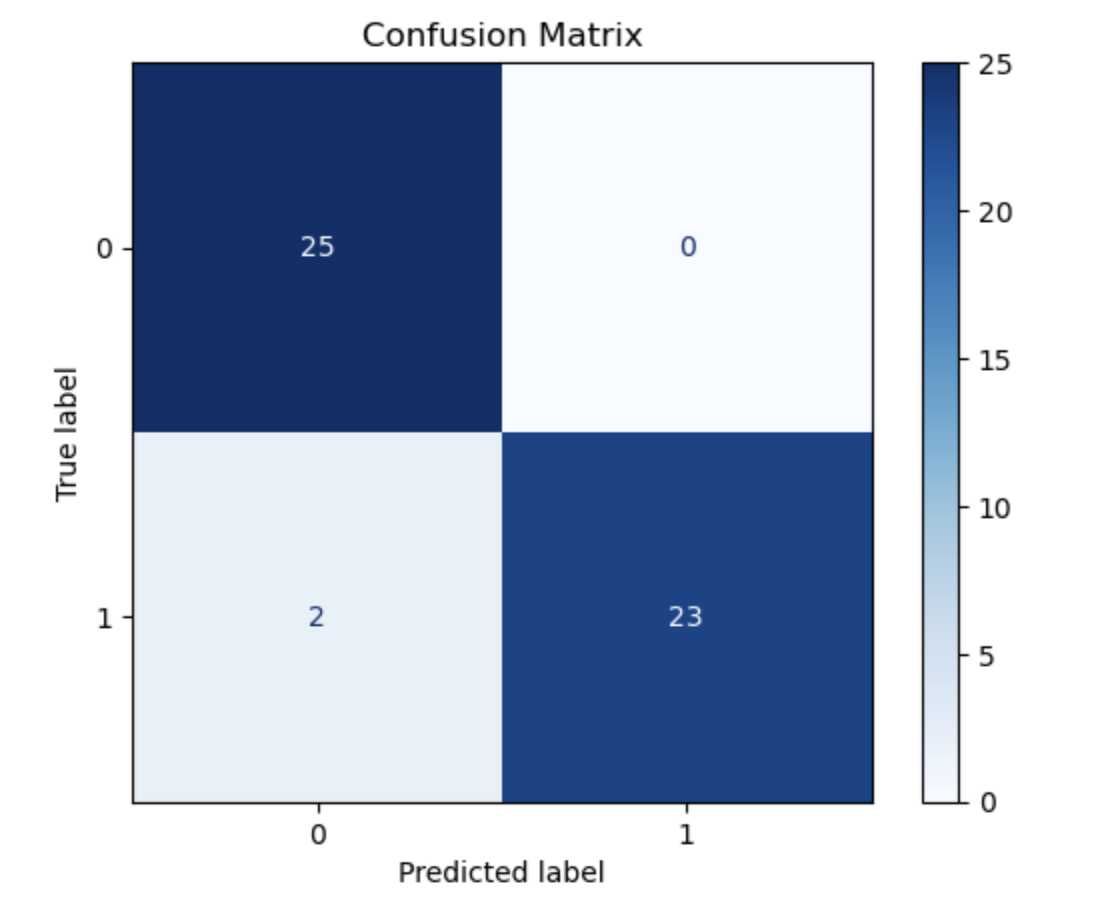

Insert confusion matrix of how well lasso regression predicted. Also maybe include some graphs (varying alpha values and regression) 
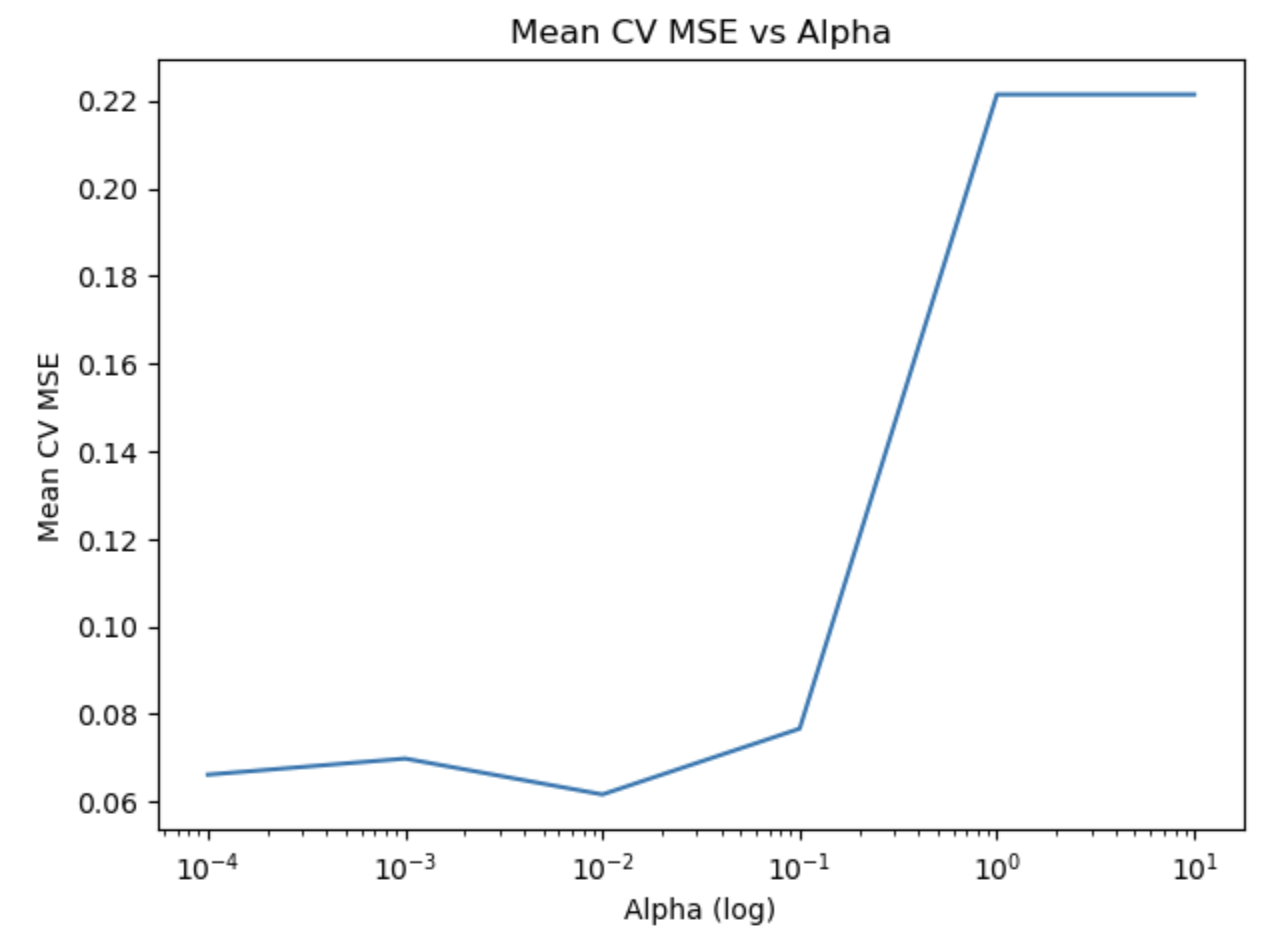

Random forest regression:  

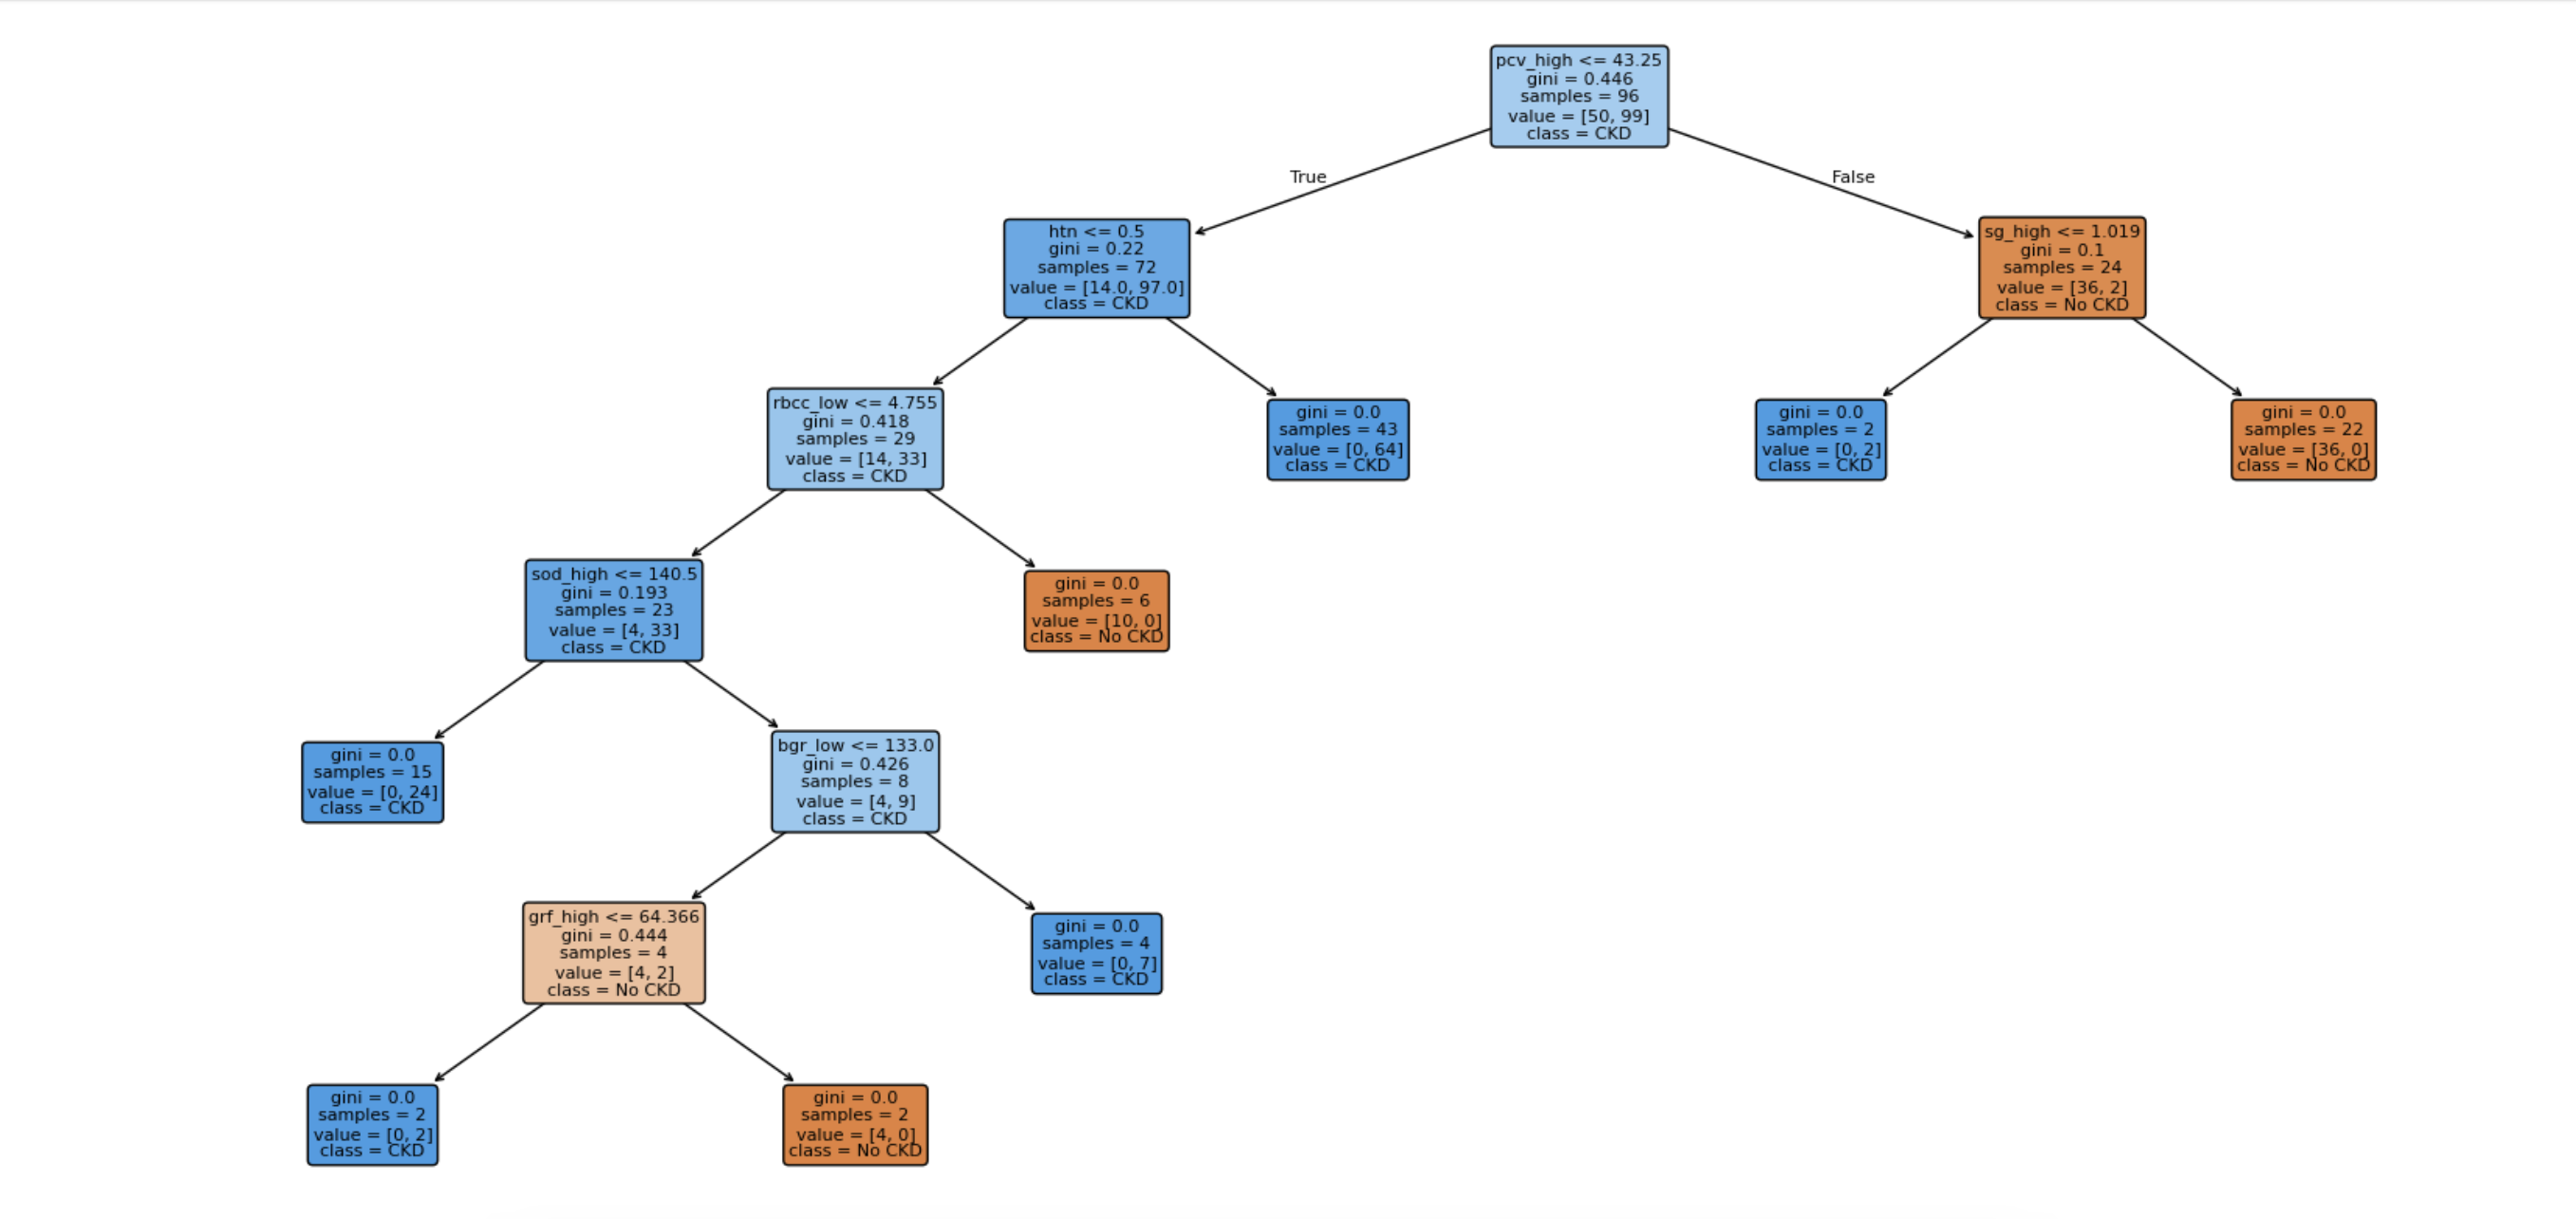  

Also insert some graphs with varying param_grid and cv error
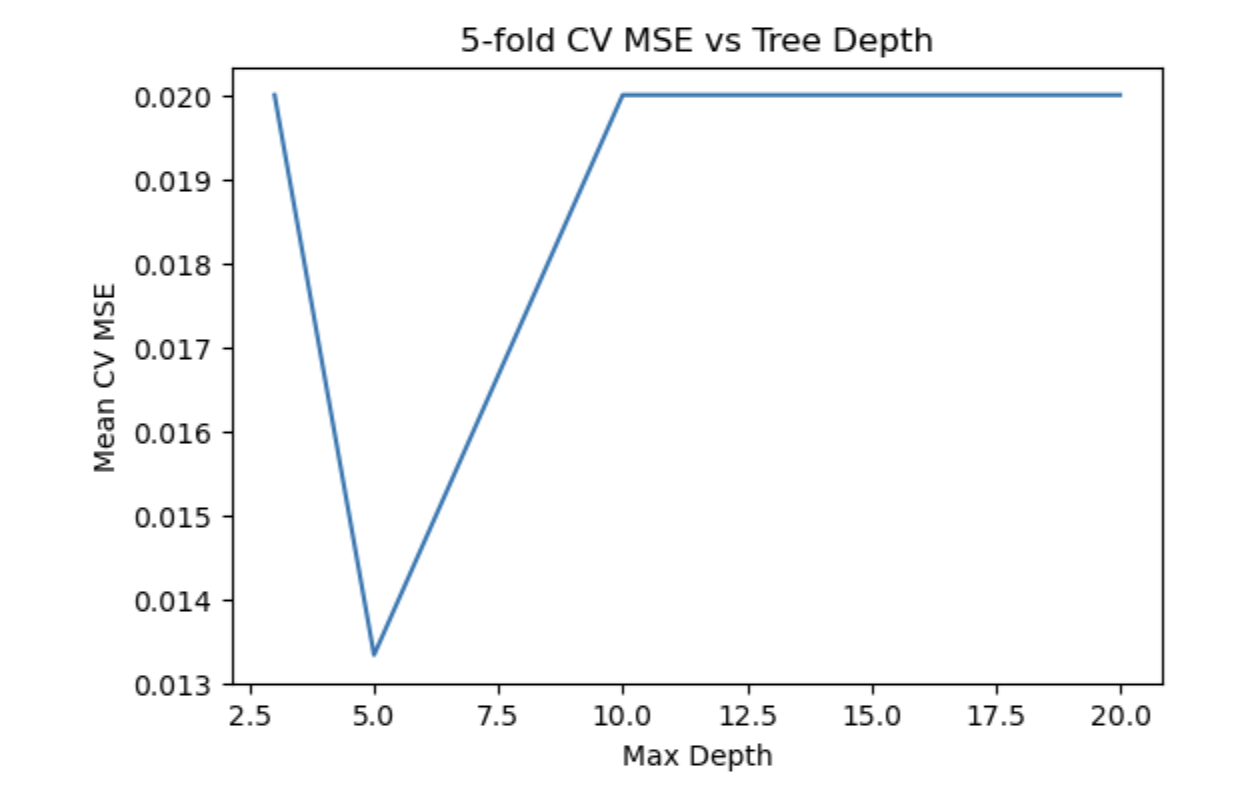

## References
[1]KDIGO. (2024). KDIGO 2024 CKD Guideline. KDIGO. https://kdigo.org/wp-content/uploads/2024/03/KDIGO-2024-CKD-Guideline.pdf  

[2]Smith, J., & Doe, A. (2025). Title of the Translational Medicine article. Journal of Translational Medicine, 23(1), 1–15. https://doi.org/10.xxxx/yyyyyyy  

[3]Johnson, L. M., & Lee, R. T. (2023). Title of the PubMed-indexed article. Journal Name, 45(7), 123-134. https://pubmed.ncbi.nlm.nih.gov/37217263/  

[4]